## 1. Librerias y configuraciones previas

In [1]:
import os
import sys

In [2]:
# Agregar el directorio raíz del proyecto al PYTHONPATH
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Sube un nivel
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)
print(f"Directorio raíz del proyecto agregado al PYTHONPATH: {ROOT_DIR}")

Directorio raíz del proyecto agregado al PYTHONPATH: c:\Users\Usuario\Documents\UdeA\especializacion\repos\monografia


In [3]:
# ==============================================================================
import pandas as pd
import numpy as np

# Almacenar en caché los resultados de funciones en el disco
# ==============================================================================
import joblib


# Gestion de librerias
# ==============================================================================
from importlib import reload

# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Formateo y estilo
# ==============================================================================
from IPython.display import Markdown, display

# Biblioteca scipy y componentes
# ==============================================================================
import scipy.io
from scipy import signal

In [4]:
# se importan las rutas
from globals import SRC_DIR, DATA_DIR, RAW_DATA_DIR, PROCESSED_DATA_DIR
# Agregar el directorio SRC_DIR al PYTHONPATH
if SRC_DIR not in sys.path:
    sys.path.append(SRC_DIR)

## 2. Funciones

In [5]:
from data_ingestion import FEATURES, load_all_mat_files, load_mat_file, get_signal_data_by_features
from data_preprocessing import num_index, segment_signal, standardize_signal, normalize_signal, detect_level_changes, calculate_rms, \
                               apply_filter_to_dataframe, segment_signal_as_matrix
#, calculate_mean, calculate_std, calculate_median, calculate_iqr, calculate_min_max, calculate_skewness, calculate_kurtosis, calculate_entropy, calculate_energy, calculate_snr, calculate_crest_factor, calculate_peak_factor, calculate_shape_factor, calculate_impulse_factor, calculate_margin_factor
from visualization import graficar_medida1, graficar_medida2



c:\Users\Usuario\Documents\UdeA\especializacion\repos\monografia\data\raw


## 3. Carga del dataset original

In [6]:
signal_data = load_mat_file(RAW_DATA_DIR,'S1_A1_E1.mat')
signal_data.keys()
FEATURES

['emg', 'repetition', 'restimulus']

In [7]:
signal_data_df = get_signal_data_by_features(signal_data, FEATURES)
signal_data_df.head()

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10,repetition,restimulus
0,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342,0,0
1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293,0,0
2,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0391,0.0024,0.0244,0,0
3,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0342,0.0024,0.0171,0,0
4,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0146,0,0


In [8]:
mascara_emg = signal_data_df.columns.str.contains('emg')
signal_data_emg_df = signal_data_df.loc[:,mascara_emg]

signal_data_repetition_df = signal_data_df[['repetition']]

signal_data_restimulus_df = signal_data_df[['restimulus']]

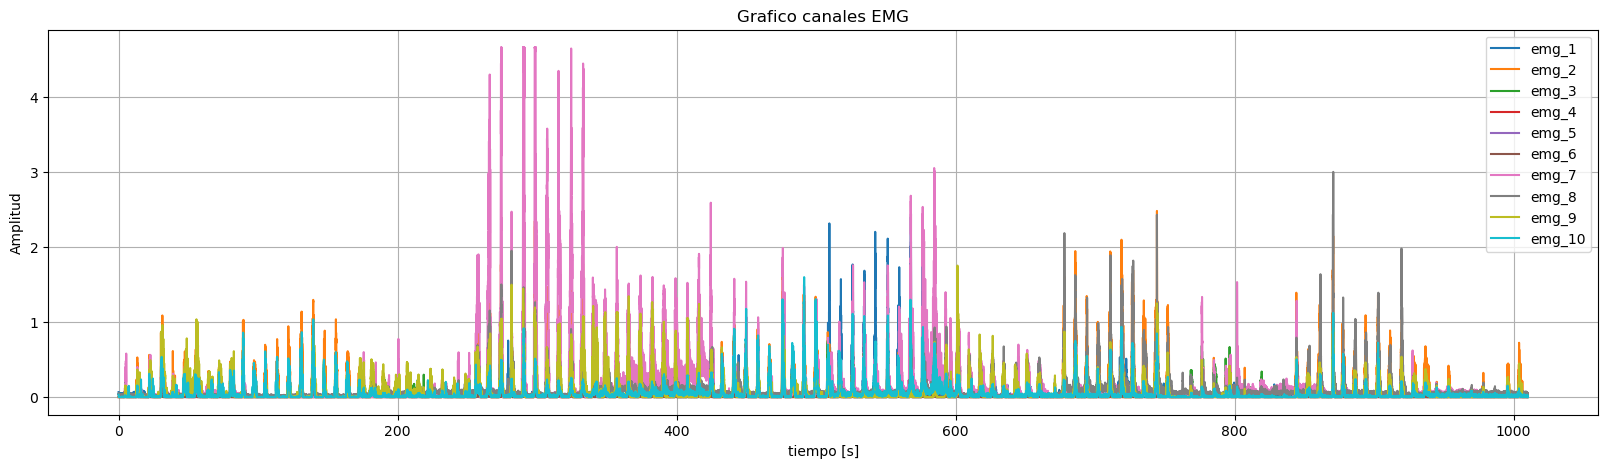

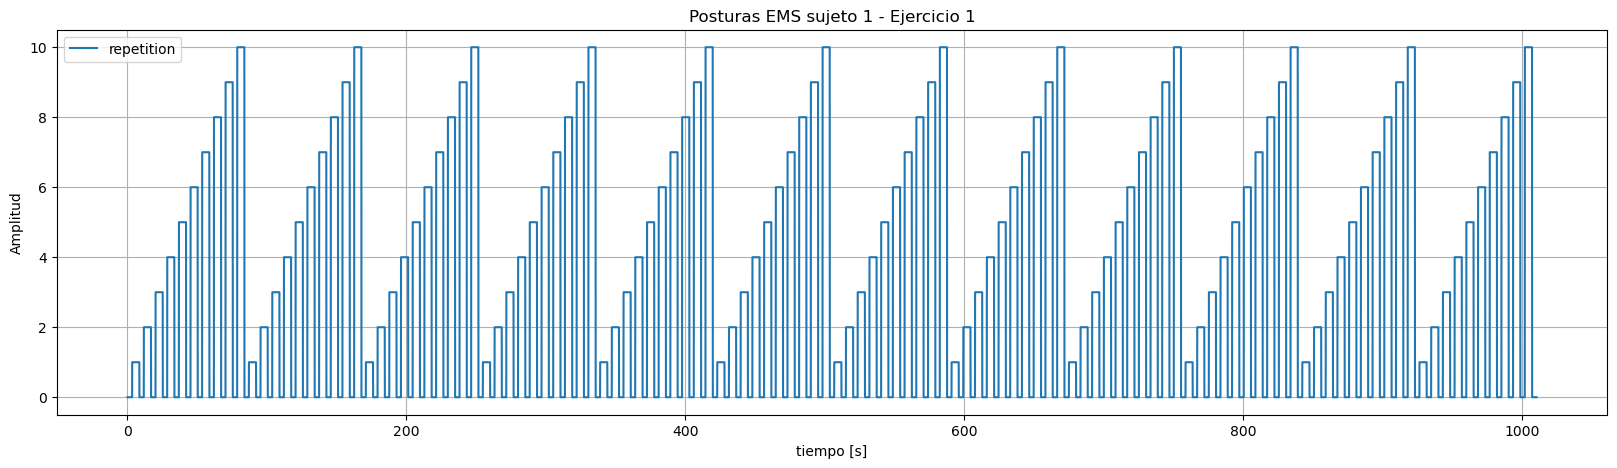

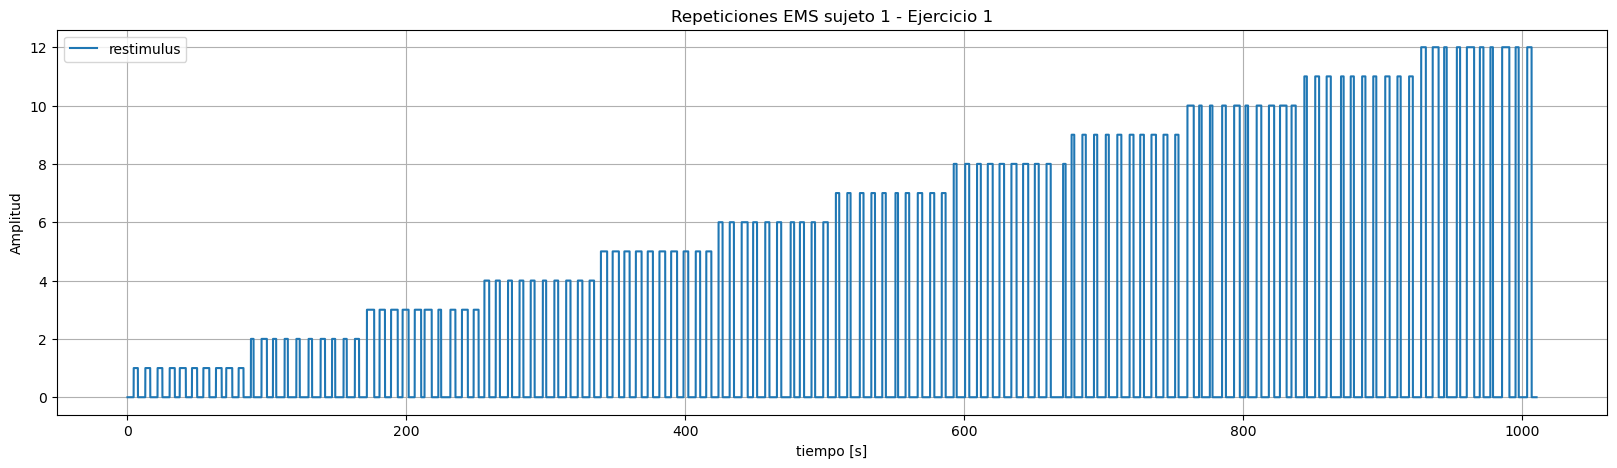

In [9]:
graficar_medida1(signal_data_emg_df,
                     columnas = signal_data_emg_df.columns,
                     titulo = "Grafico canales EMG",
                     # etiqueta_x="n",
                     fs = 100,
                     #etiqueta_y="Amplitud"
                     )

graficar_medida1(signal_data_repetition_df, 
                 columnas=signal_data_repetition_df.columns, 
                 fs = 100,
                 titulo = "Posturas EMS sujeto 1 - Ejercicio 1")

graficar_medida1(signal_data_restimulus_df,
                columnas=signal_data_restimulus_df.columns, 
                fs = 100,
                titulo = "Repeticiones EMS sujeto 1 - Ejercicio 1")

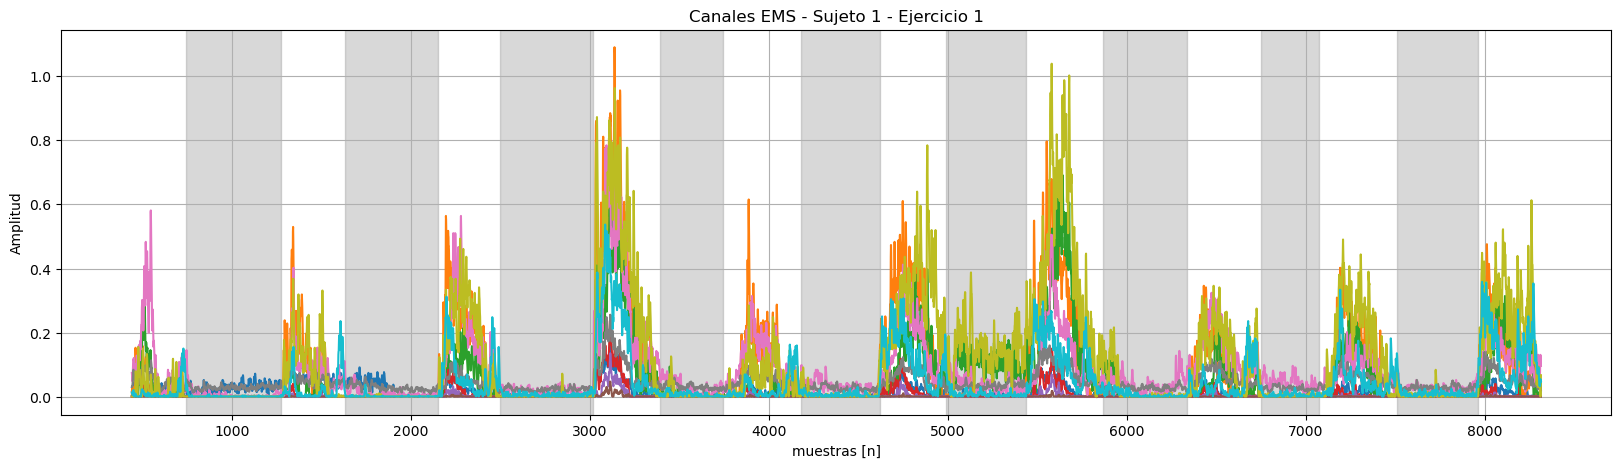

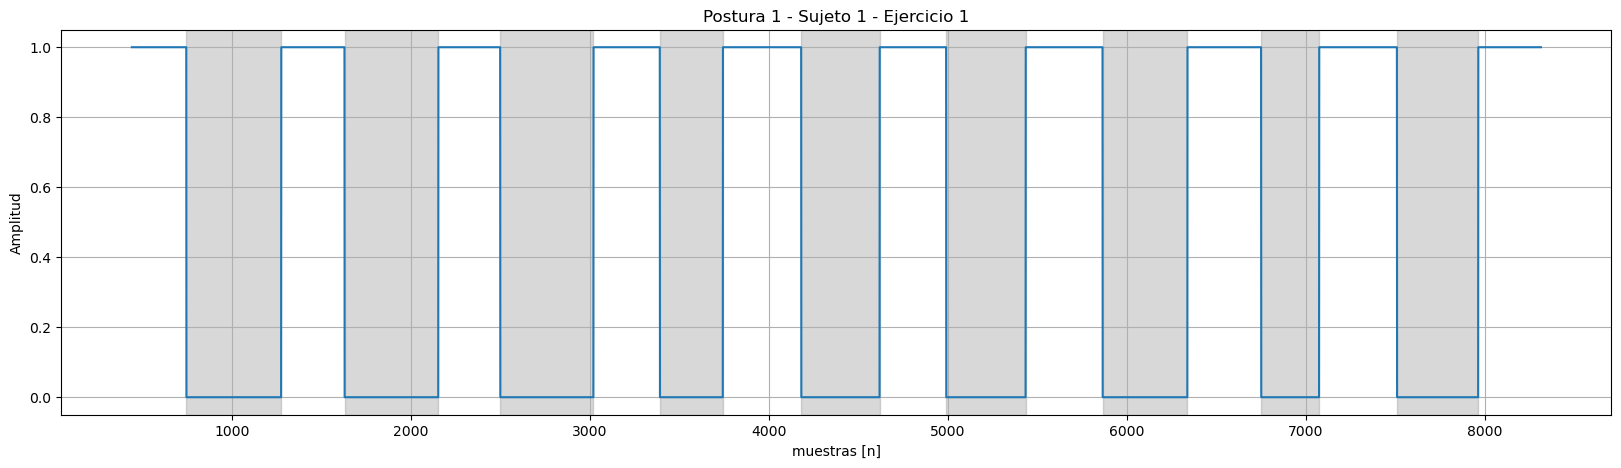

In [10]:
# Funciones sobre las señales

graficar_medida2(signal_data_df, 
                 columnas = signal_data_df.columns[0:10], 
                 labels = signal_data_df['restimulus'],
                 num = 1, 
                 fs = None,
                 titulo="Canales EMS - Sujeto 1 - Ejercicio 1"
                 )

graficar_medida2(signal_data_df, 
                 columnas = ['restimulus'], 
                 labels = signal_data_restimulus_df['restimulus'],
                 num = 1, 
                 fs = None,
                 titulo="Postura 1 - Sujeto 1 - Ejercicio 1"
                 )

## Señales EMG

In [13]:
signal_data_emg_df.head()

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10
0,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342
1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293
2,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0391,0.0024,0.0244
3,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0342,0.0024,0.0171
4,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0146


### Filtrado

In [12]:
signal_data_emg_df_filt =  apply_filter_to_dataframe(signal_data_emg_df)


In [13]:
signal_data_emg_df_filt.head()


,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10
0,0.067523,0.002402,0.002399,0.002403,0.002395,0.009800,0.0024,0.050357,0.0024,0.034192
1,0.066284,0.002402,0.002402,0.002404,0.002395,0.009474,0.0024,0.049707,0.0024,0.032820
2,0.065045,0.002403,0.002405,0.002404,0.002395,0.009149,0.0024,0.049050,0.0024,0.031452
3,0.063810,0.002403,0.002409,0.002405,0.002395,0.008827,0.0024,0.048390,0.0024,0.030091
4,0.062581,0.002404,0.002412,0.002406,0.002395,0.008507,0.0024,0.047726,0.0024,0.028743


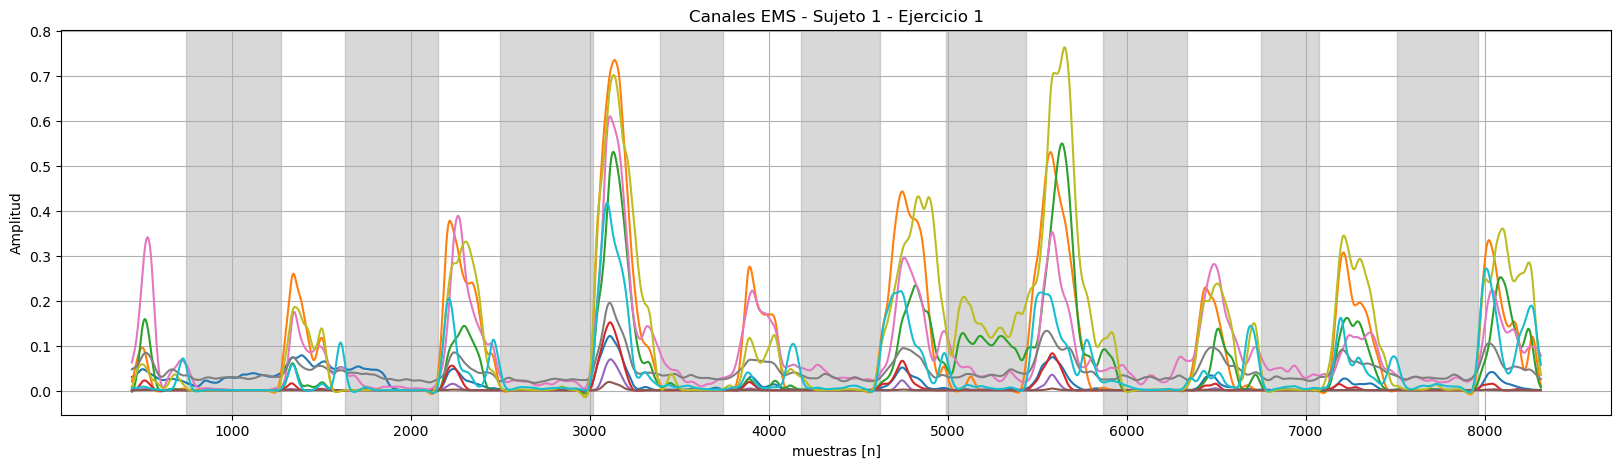

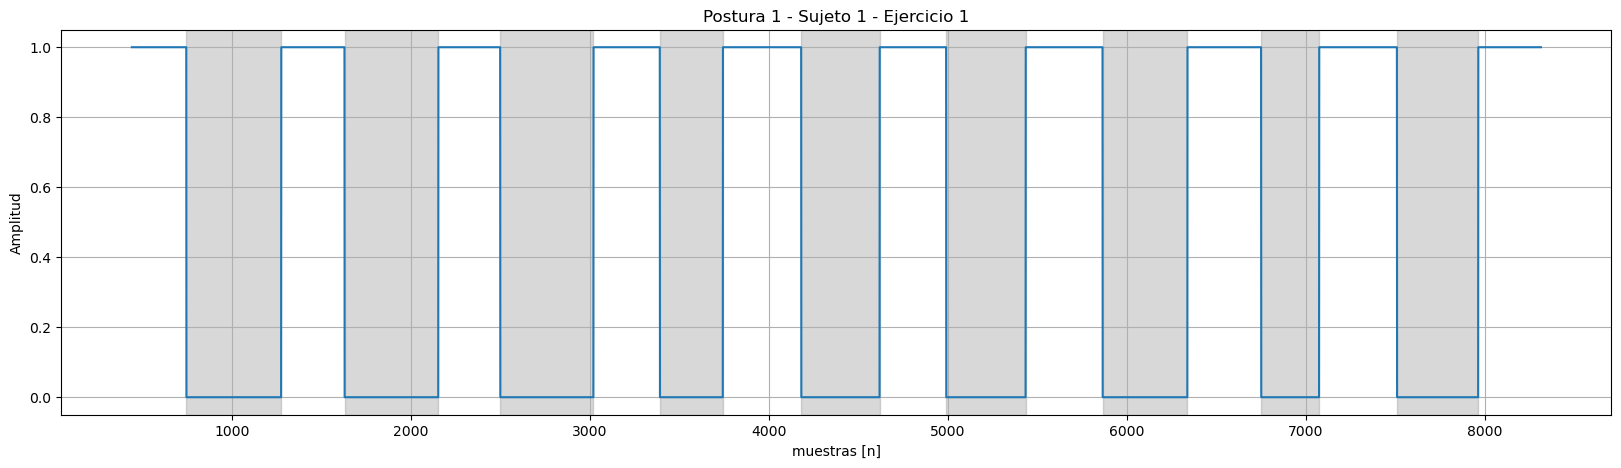

In [15]:
graficar_medida2(signal_data_emg_df_filt, 
                 columnas = signal_data_emg_df_filt, 
                 labels = signal_data_df['restimulus'],
                 num = 1, 
                 fs = None,
                 titulo="Canales EMS - Sujeto 1 - Ejercicio 1"
                 )

graficar_medida2(signal_data_df, 
                 columnas = ['restimulus'], 
                 labels = signal_data_restimulus_df['restimulus'],
                 num = 1, 
                 fs = None,
                 titulo="Postura 1 - Sujeto 1 - Ejercicio 1"
                 )

## Reducción a un solo canal

Vamos a realizar el procedimiento completo para un solo canal y si todo sale bien, se extenderá el proceso para varios canales. En resumen lo que se buscará es:
* Realizar un procesamiento basico.
* Mirar el EDA solo para la señal de este canal.

Es importante tener en cuenta que por ahora no nos vamos a preocupar por cuestiones como el rotulado del ejercicio u otras cosas que van fuera del procesamiento de la señal.

### Procesamiento basico

Vamos a elegir solo el canal 1

#### Señal cruda

In [10]:
signal_data_emg_df.head()

,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,emg_10
0,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342
1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293
2,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0391,0.0024,0.0244
3,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0342,0.0024,0.0171
4,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0146


In [11]:
signal_emg_1 = signal_data_emg_df[['emg_1']]
signal_emg_1.head()

,emg_1
0,0.0684
1,0.0586
2,0.0562
3,0.0562
4,0.0488


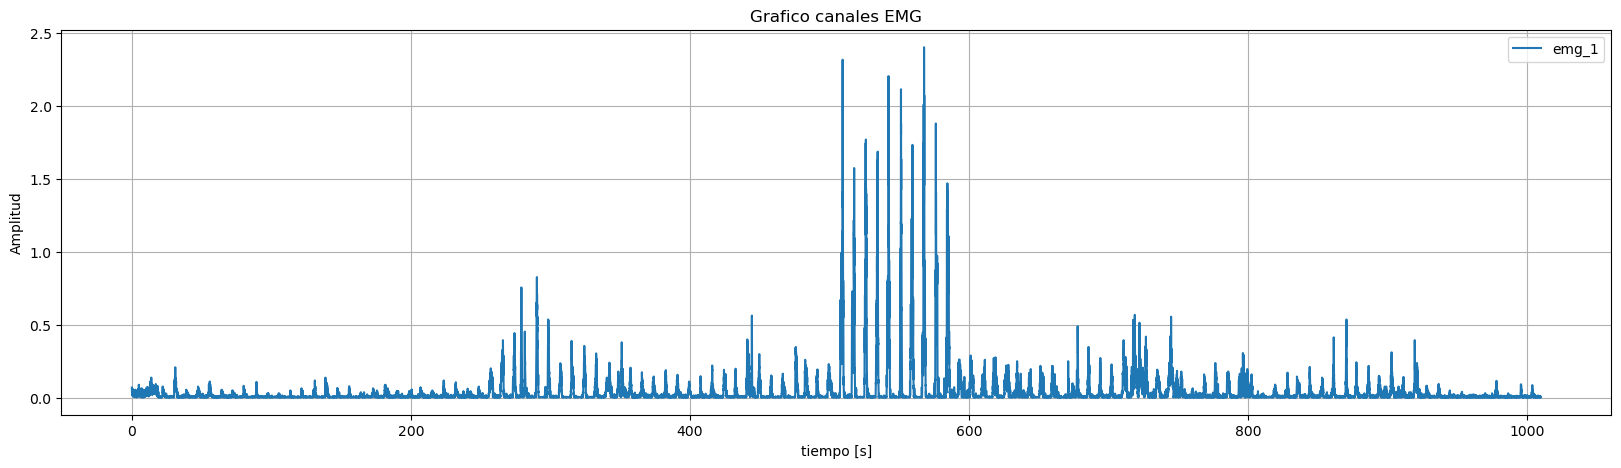

In [12]:
graficar_medida1(signal_emg_1,
                     columnas = signal_emg_1.columns,
                     titulo = "Grafico canales EMG",
                     # etiqueta_x="n",
                     fs = 100,
                     #etiqueta_y="Amplitud"
                     )

#### Señal filtrada

Canal 1 filtrado

In [13]:
signal_emg_1_filt =  apply_filter_to_dataframe(signal_emg_1)
signal_emg_1_filt.head()

,emg_1
0,0.067523
1,0.066284
2,0.065045
3,0.063810
4,0.062581


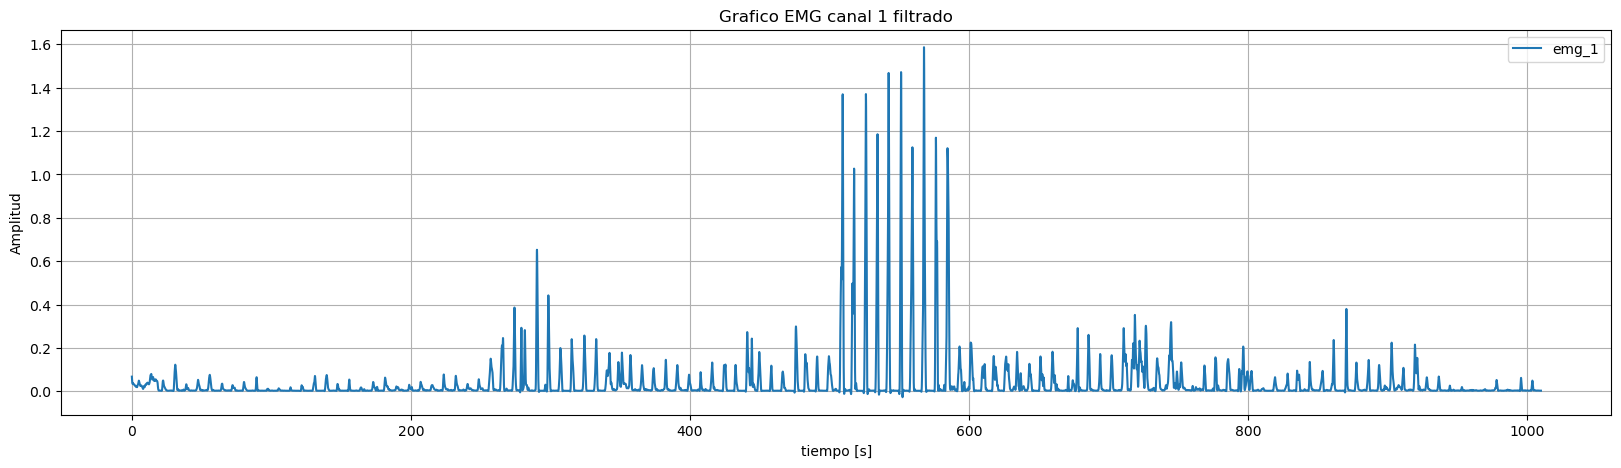

In [14]:
graficar_medida1(signal_emg_1_filt,
                     columnas = signal_emg_1_filt.columns,
                     titulo = "Grafico EMG canal 1 filtrado",
                     # etiqueta_x="n",
                     fs = 100,
                     #etiqueta_y="Amplitud"
                     )

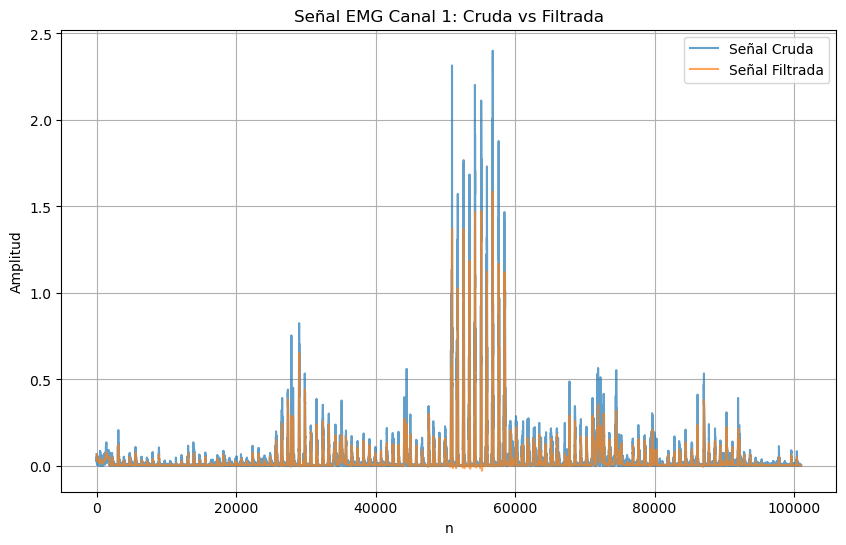

In [15]:
# Por IA
plt.figure(figsize=(10, 6))
plt.plot(signal_emg_1.index, signal_emg_1['emg_1'], label='Señal Cruda', alpha=0.7)
plt.plot(signal_emg_1_filt.index, signal_emg_1_filt['emg_1'], label='Señal Filtrada', alpha=0.7)
plt.title('Señal EMG Canal 1: Cruda vs Filtrada')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

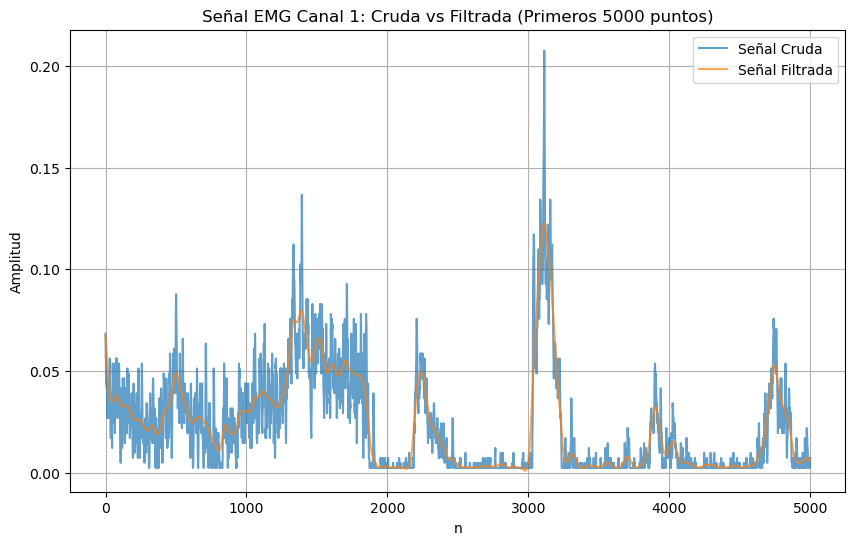

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(signal_emg_1.index[:5000], signal_emg_1['emg_1'][:5000], label='Señal Cruda', alpha=0.7)
plt.plot(signal_emg_1_filt.index[:5000], signal_emg_1_filt['emg_1'][:5000], label='Señal Filtrada', alpha=0.7)
plt.title('Señal EMG Canal 1: Cruda vs Filtrada (Primeros 5000 puntos)')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

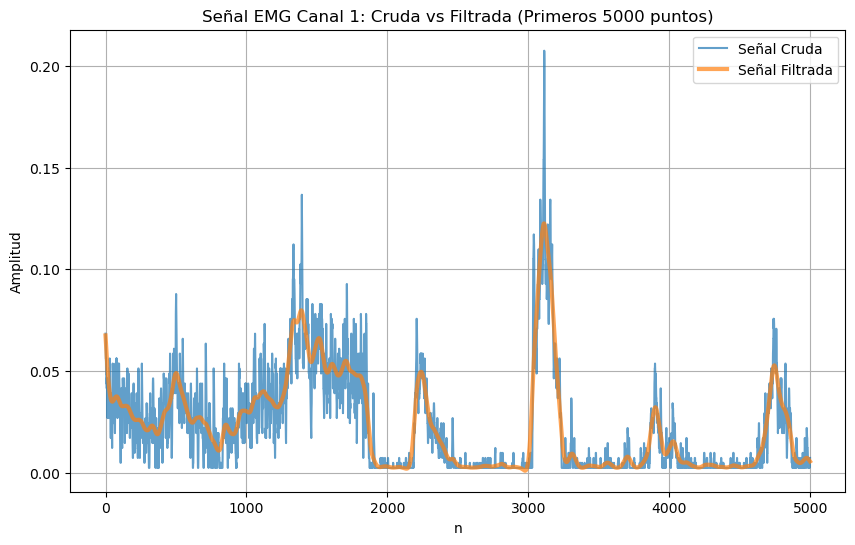

In [17]:
# Definir el tamaño de la muestra
final_N = 5000

# Graficar señal cruda y filtrada con línea más gruesa para la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(signal_emg_1.index[:5000], signal_emg_1['emg_1'][:final_N], label='Señal Cruda', alpha=0.7)
plt.plot(signal_emg_1_filt.index[:5000], signal_emg_1_filt['emg_1'][:final_N], label='Señal Filtrada', alpha=0.7, linewidth=3)
plt.title(f'Señal EMG Canal 1: Cruda vs Filtrada (Primeros {final_N} puntos)')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

#### Segmentacion de la señal

Ahora vamos a proceder a realizar la segmentación de la señal.

In [19]:
# Ejemplo de uso
w_size = 30  # Tamaño de la ventana
overlap = 0.33  # 50% de solapamiento
# ventanas = segment_signal(signal_emg_1_filt, window_size = w_size, overlap = overlap)
ventanas = segment_signal_as_matrix(signal_emg_1_filt, window_size = w_size, overlap = overlap)
#print(ventanas[0])

print(f"Se generaron {len(ventanas)} ventanas de tamaño 30 con 33% de solapamiento.")
print(f"Tamaño de la matriz: {ventanas.shape}")

ValueError: could not broadcast input array from shape (30,1) into shape (30,)

### Segmentacion

## Referencias

### Recursos previos

1. https://github.com/repos-especializacion-UdeA/trabajo-final_AA1/blob/main/notebooks_pasos_previos/00_preprocesamiento_dataset_clasificacion.ipynb
2. https://github.com/repos-especializacion-UdeA/EDA_ninapro_DB1/tree/main
3. https://github.com/nihil21/semg-bss/blob/master/(biowolf)%20Decomposition%20of%20sEMG%20signals.ipynb
4. https://github.com/hkcornwell/sEMG-signal-classification/blob/master/EMG%20Data%20%26%20Visual%20Exploration.ipynb
5. https://electrophys.wordpress.com/home/electromyography/filtering-and-analyzing-emg-data/
6. https://github.com/emckiernan/electrophys
7. https://electrophys.wordpress.com/home/electromyography/
8. https://github.com/SebastianRestrepoA/EMG-pattern-recognition
   
   
### Para consultar

1. https://biosppy.readthedocs.io/en/stable/biosppy.html#biosppy-stats
2. https://sites.google.com/view/ts-clasp/clasp
3. https://www.sktime.net/en/latest/examples/annotation/segmentation_with_clasp.html
4. https://github.com/repos-especializacion-UdeA/aprendizaje_automatico1/tree/main/dataset
5. https://github.com/parasgulati8/NinaPro-Helper-Library
6. https://github.com/tsagkas/sEMG-HandGestureRecognition
7. https://github.com/jcvasquezc/PDS_2019.2/blob/master/lab3_LTI_systems_and_timeseries_modeling/.ipynb_checkpoints/Laboratorio%203-checkpoint.ipynb
8. https://github.com/hongnhung910/EMG-Signal-Processing/tree/master
9. https://colab.research.google.com/github/spatialaudio/digital-signal-processing-lecture/blob/master/index.ipynb